In [1]:
import pandas as pd

In [2]:
df = pd.read_feather('internacoes_rn_amostra.feather')

In [46]:
df['DT_INTER'].unique().tolist()

[20131206,
 20140114,
 20131220,
 20131203,
 20131227,
 20140109,
 20131221,
 20131228,
 20131226,
 20131213,
 20140123,
 20140110,
 20131230,
 20140107,
 20140103,
 20131219,
 20131217,
 20131225,
 20131205,
 20131214,
 20131223,
 20131007,
 20140121,
 20131210,
 20140117,
 20140118,
 20131209,
 20140112,
 20140128,
 20140116,
 20140108,
 20140102,
 20131229,
 20130912,
 20140120,
 20131216,
 20140119,
 20140105,
 20140126,
 20140127,
 20130924,
 20131017,
 20131218,
 20131211,
 20130922,
 20131207,
 20130917,
 20131202,
 20140115,
 20131108,
 20131231,
 20140111,
 20140106,
 20140124,
 20140125,
 20131112,
 20140129,
 20140113,
 20140122,
 20130906,
 20131215,
 20131212,
 20131127,
 20140104,
 20131208,
 20131222,
 20131030,
 20140101,
 20131201,
 20131130,
 20140130,
 20140131,
 20131101,
 20131015,
 20131009,
 20131204,
 20131126,
 20131023,
 20131113,
 20131110,
 20131115,
 20131120,
 20131129,
 20131125,
 20131116,
 20131020,
 20131124,
 20131119,
 20131114,
 20131123,
 20131107,

In [1]:
from pymongo import MongoClient

container_ip = '172.20.0.2'
client = MongoClient('mongodb://{}:27017'.format(container_ip), serverSelectionTimeoutMS=5000)
db = client['mydatabase']
collection = db['leitos_collection']

print(list(collection.find().limit(5)))


ServerSelectionTimeoutError: No servers found yet, Timeout: 5.0s, Topology Description: <TopologyDescription id: 668e0039b4b5b865c5e130fa, topology_type: Unknown, servers: [<ServerDescription ('172.20.0.2', 27017) server_type: Unknown, rtt: None>]>

In [36]:
import requests

url = 'http://127.0.0.1:8001/internacoes/taxa-ocupacao/'

response = requests.get(url)

print(response.json())

[{'cnes': 2410443, 'total_internacoes': 98, 'total_leitos': 545, 'taxa_ocupacao': 0.599388379204893}, {'cnes': 2475278, 'total_internacoes': 10, 'total_leitos': 264, 'taxa_ocupacao': 0.12626262626262627}, {'cnes': 2475464, 'total_internacoes': 12, 'total_leitos': 132, 'taxa_ocupacao': 0.30303030303030304}, {'cnes': 2410338, 'total_internacoes': 27, 'total_leitos': 374, 'taxa_ocupacao': 0.24064171122994654}, {'cnes': 2473380, 'total_internacoes': 250, 'total_leitos': 748, 'taxa_ocupacao': 1.1140819964349375}, {'cnes': 2410281, 'total_internacoes': 373, 'total_leitos': 1027, 'taxa_ocupacao': 1.210645894190198}, {'cnes': 4012526, 'total_internacoes': 61, 'total_leitos': 460, 'taxa_ocupacao': 0.44202898550724634}, {'cnes': 2380706, 'total_internacoes': 6, 'total_leitos': 176, 'taxa_ocupacao': 0.11363636363636363}, {'cnes': 2407582, 'total_internacoes': 11, 'total_leitos': 165, 'taxa_ocupacao': 0.2222222222222222}, {'cnes': 2408023, 'total_internacoes': 31, 'total_leitos': 308, 'taxa_ocupac

ir ao datasus

entrar no tabwin

baixar os dados de sihsus

arquivos auxiliares para tabulação

In [13]:
import requests

url = 'http://127.0.0.1:8001/internacoes/media-dias-internacao/'
params = {
    'especialidade': 1,
    'cnes': 5314267,
    'mes_ano_inicio': '201401',  # Formato YYYYMM
    'mes_ano_fim': '201412',  # Formato YYYYMM
    'municipio_res': 240530,
    'municipio_mov': 240810
}

response = requests.get(url, params=params)

if response.status_code == 200:
    print(response.json())
else:
    print("Erro:", response.status_code, response.text)


[{'_id': 1, 'media_dias_internacao': 3.0}]


In [47]:
import requests

url = "http://127.0.0.1:8001/internacoes/numero-percentual-internacoes/"
params = {
    'cnes': 5314267,
    'mes_ano_inicio': '200901',
    'mes_ano_fim': '201412',
}

response = requests.get(url, params=params)

if response.status_code == 200:
    print(response.json())
else:
    print("Erro:", response.status_code, response.text)


[{'capitulo_cid': 'J960', 'numero_internacoes': 2, 'percentual_internacoes': 1.7857142857142856}, {'capitulo_cid': 'R02', 'numero_internacoes': 62, 'percentual_internacoes': 55.35714285714286}, {'capitulo_cid': 'A499', 'numero_internacoes': 45, 'percentual_internacoes': 40.17857142857143}, {'capitulo_cid': 'I831', 'numero_internacoes': 1, 'percentual_internacoes': 0.8928571428571428}, {'capitulo_cid': 'S528', 'numero_internacoes': 1, 'percentual_internacoes': 0.8928571428571428}, {'capitulo_cid': 'K055', 'numero_internacoes': 1, 'percentual_internacoes': 0.8928571428571428}]


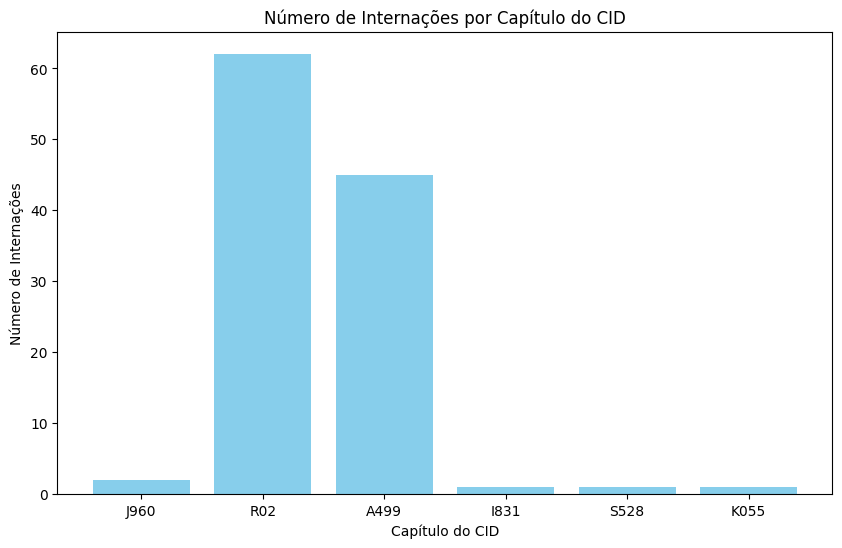

In [48]:
import matplotlib.pyplot as plt

# Dados fornecidos
dados = [{'capitulo_cid': 'J960', 'numero_internacoes': 2, 'percentual_internacoes': 1.7857142857142856}, {'capitulo_cid': 'R02', 'numero_internacoes': 62, 'percentual_internacoes': 55.35714285714286}, {'capitulo_cid': 'A499', 'numero_internacoes': 45, 'percentual_internacoes': 40.17857142857143}, {'capitulo_cid': 'I831', 'numero_internacoes': 1, 'percentual_internacoes': 0.8928571428571428}, {'capitulo_cid': 'S528', 'numero_internacoes': 1, 'percentual_internacoes': 0.8928571428571428}, {'capitulo_cid': 'K055', 'numero_internacoes': 1, 'percentual_internacoes': 0.8928571428571428}]



# Extração dos dados
capitulos_cid = [d['capitulo_cid'] for d in dados]
numero_internacoes = [d['numero_internacoes'] for d in dados]
percentual_internacoes = [d['percentual_internacoes'] for d in dados]

# Criação do gráfico de barras para o número de internações
plt.figure(figsize=(10, 6))
plt.bar(capitulos_cid, numero_internacoes, color='skyblue')
plt.title('Número de Internações por Capítulo do CID')
plt.xlabel('Capítulo do CID')
plt.ylabel('Número de Internações')
plt.show()

# Para criar um gráfico do percentual de internações, basta substituir `numero_internacoes` por `percentual_internacoes` na função plt.bar().

In [35]:
import requests

url = "http://127.0.0.1:8001/internacoes/valor-medio-internacao/" 
params = {
    'especialidade': 1,
    'cnes': 5314267,
    'mes_ano_inicio': '201401',
    'mes_ano_fim': '201412',
    'municipio_res': 240530,
    'municipio_mov': 240810
}

response = requests.get(url, params=params)

if response.status_code == 200:
    print(response.json())
else:
    print("Erro:", response.status_code, response.text)


[{'_id': 1, 'valor_medio': 559.08}]


In [37]:
import requests

url = "http://127.0.0.1:8001/internacoes/taxa-ocupacao/"
params = {
    'cnes': 5314267,
    'mes_ano_inicio': '201401',
    'mes_ano_fim': '201412',
    'municipio_res': 240530,
    'municipio_mov': 240810
}

response = requests.get(url, params=params)

if response.status_code == 200:
    print(response.json())
else:
    print("Erro:", response.status_code, response.text)

[{'cnes': 5314267, 'total_internacoes': 2, 'total_leitos': 900, 'taxa_ocupacao': 0.007407407407407408}]


In [32]:
ESPEC_MAP = {
    1: 'Cirúrgico',
    2: 'Obstétricos',
    3: 'Clínico',
    4: 'Crônicos',
    5: 'Psiquiatria',
    6: 'Pneumologia Sanitária (Tisiologia)',
    7: 'Pediátricos',
    8: 'Reabilitação',
    9: 'Leito Dia / Cirúrgicos',
    10: 'Leito Dia / Aids',
    11: 'Leito Dia / Fibrose Cística',
    12: 'Leito Dia / Intercorrência Pós-Transplante',
    13: 'Leito Dia / Geriatria',
    14: 'Leito Dia / Saúde Mental',
    51: 'UTI II Adulto COVID 19',
    52: 'UTI II Pediátrica COVID 19',
    64: 'Unidade Intermediária',
    65: 'Unidade Intermediária Neonatal',
    74: 'UTI I',
    75: 'UTI Adulto II',
    76: 'UTI Adulto III',
    77: 'UTI Infantil I',
    78: 'UTI Infantil II',
    79: 'UTI Infantil III',
    80: 'UTI Neonatal I',
    81: 'UTI Neonatal II',
    82: 'UTI Neonatal III',
    83: 'UTI Queimados',
    84: 'Acolhimento Noturno',
    85: 'UTI Coronariana-UCO tipo II',
    86: 'UTI Coronariana-UCO tipo III',
    87: 'Saúde Mental (Clínico)',
    88: 'Queimado Adulto (Clínico)',
    89: 'Queimado Pediátrico (Clínico)',
    90: 'Queimado Adulto (Cirúrgico)',
    91: 'Queimado Pediátrico (Cirúrgico)',
    92: 'UCI Unidade de Cuidados Intermediarios Neonatal Convencional',
    93: 'UCI Unidade de Cuidados Intermediarios Neonatal Canguru',
    94: 'UCI Unidade de Cuidados Intermediarios Pediatrico',
    95: 'UCI Unidade de Cuidados Intermediarios Adulto',
    96: 'Suporte Ventilatório Pulmonar COVID-19',
}

MUNICIPIO_MAP = {
    240000: 'MUNICIPIO IGNORADO - RN',
    240010: 'ACARI',
    240020: 'ACU',
    240030: 'AFONSO BEZERRA',
    240040: 'AGUA NOVA',
    240050: 'ALEXANDRIA',
    240060: 'ALMINO AFONSO',
    240070: 'ALTO DO RODRIGUES',
    240080: 'ANGICOS',
    240090: 'ANTONIO MARTINS',
    240100: 'APODI',
    240110: 'AREIA BRANCA',
    240120: 'ARES',
    240130: 'AUGUSTO SEVERO',
    240140: 'BAIA FORMOSA',
    240145: 'BARAUNA',
    240150: 'BARCELONA',
    240160: 'BENTO FERNANDES',
    240165: 'BODO',
    240170: 'BOM JESUS',
    240180: 'BREJINHO',
    240185: 'CAICARA DO NORTE',
    240190: 'CAICARA DO RIO DO VENTO',
    240200: 'CAICO',
    240210: 'CAMPO REDONDO',
    240220: 'CANGUARETAMA',
    240230: 'CARAUBAS',
    240240: 'CARNAUBA DOS DANTAS',
    240250: 'CARNAUBAIS',
    240260: 'CEARA-MIRIM',
    240270: 'CERRO CORA',
    240280: 'CORONEL EZEQUIEL',
    240290: 'CORONEL JOAO PESSOA',
    240300: 'CRUZETA',
    240310: 'CURRAIS NOVOS',
    240320: 'DOUTOR SEVERIANO',
    240325: 'PARNAMIRIM',
    240330: 'ENCANTO',
    240340: 'EQUADOR',
    240350: 'ESPIRITO SANTO',
    240360: 'EXTREMOZ',
    240370: 'FELIPE GUERRA',
    240375: 'FERNANDO PEDROZA',
    240380: 'FLORANIA',
    240390: 'FRANCISCO DANTAS',
    240400: 'FRUTUOSO GOMES',
    240410: 'GALINHOS',
    240420: 'GOIANINHA',
    240430: 'GOVERNADOR DIX-SEPT ROSADO',
    240440: 'GROSSOS',
    240450: 'GUAMARE',
    240460: 'IELMO MARINHO',
    240470: 'IPANGUACU',
    240480: 'IPUEIRA',
    240485: 'ITAJA',
    240490: 'ITAU',
    240500: 'JACANA',
    240510: 'JANDAIRA',
    240520: 'JANDUIS',
    240530: 'JANUARIO CICCO',
    240540: 'JAPI',
    240550: 'JARDIM DE ANGICOS',
    240560: 'JARDIM DE PIRANHAS',
    240570: 'JARDIM DO SERIDO',
    240580: 'JOAO CAMARA',
    240590: 'JOAO DIAS',
    240600: 'JOSE DA PENHA',
    240610: 'JUCURUTU',
    240615: 'JUNDIA',
    240620: 'LAGOA D\'ANTA',
    240630: 'LAGOA DE PEDRAS',
    240640: 'LAGOA DE VELHOS',
    240650: 'LAGOA NOVA',
    240660: 'LAGOA SALGADA',
    240670: 'LAJES',
    240680: 'LAJES PINTADAS',
    240690: 'LUCRECIA',
    240700: 'LUIS GOMES',
    240710: 'MACAIBA',
    240720: 'MACAU',
    240725: 'MAJOR SALES',
    240730: 'MARCELINO VIEIRA',
    240740: 'MARTINS',
    240750: 'MAXARANGUAPE',
    240760: 'MESSIAS TARGINO',
    240770: 'MONTANHAS',
    240780: 'MONTE ALEGRE',
    240790: 'MONTE DAS GAMELEIRAS',
    240800: 'MOSSORO',
    240810: 'NATAL',
    240820: 'NISIA FLORESTA',
    240830: 'NOVA CRUZ',
    240840: 'OLHO-D\'AGUA DO BORGES',
    240850: 'OURO BRANCO',
    240860: 'PARANA',
    240870: 'PARAU',
    240880: 'PARAZINHO',
    240890: 'PARELHAS',
    240895: 'RIO DO FOGO',
    240910: 'PASSA E FICA',
    240920: 'PASSAGEM',
    240930: 'PATU',
    240933: 'SANTA MARIA',
    240940: 'PAU DOS FERROS',
    240950: 'PEDRA GRANDE',
    240960: 'PEDRA PRETA',
    240970: 'PEDRO AVELINO',
    240980: 'PEDRO VELHO',
    240990: 'PENDENCIAS',
    241000: 'PILOES',
    241010: 'POCO BRANCO',
    241020: 'PORTALEGRE',
    241025: 'PORTO DO MANGUE',
    241030: 'PRESIDENTE JUSCELINO',
    241040: 'PUREZA',
    241050: 'RAFAEL FERNANDES',
    241060: 'RAFAEL GODEIRO',
    241070: 'RIACHO DA CRUZ',
    241080: 'RIACHO DE SANTANA',
    241090: 'RIACHUELO',
    241100: 'RODOLFO FERNANDES',
    241105: 'TIBAU',
    241110: 'ROTEIRO',
    241120: 'SANTANA DO MATOS',
    241140: 'SANTO ANTONIO',
    241150: 'SAO BENTO DO NORTE',
    241160: 'SAO BENTO DO TRAIRI',
    241170: 'SAO FERNANDO',
    241180: 'SAO FRANCISCO DO OESTE',
    241190: 'SAO GONCALO DO AMARANTE',
    241200: 'SAO JOAO DO SABUGI',
    241210: 'SAO JOSE DE MIPIBU',
    241220: 'SAO JOSE DO CAMPESTRE',
    241230: 'SAO JOSE DO SERIDO',
    241240: 'SAO MIGUEL',
    241250: 'SAO MIGUEL DO GOSTOSO',
    241255: 'SAO PAULO DO POTENGI',
    241260: 'SAO PEDRO',
    241270: 'SAO RAFAEL',
    241280: 'SAO TOME',
    241290: 'SAO VICENTE',
    241300: 'SENADOR ELOI DE SOUZA',
    241310: 'SENADOR GEORGINO AVELINO',
    241320: 'SERRA CAIADA',
    241330: 'SERRA DE SAO BENTO',
    241335: 'SERRA DO MEL',
    241340: 'SERRA NEGRA DO NORTE',
    241350: 'SERRINHA',
    241355: 'SERRINHA DOS PINTOS',
    241360: 'SEVERIANO MELO',
    241370: 'SITIO NOVO',
    241380: 'TABOLEIRO GRANDE',
    241390: 'TAIPU',
    241400: 'TANGARA',
    241410: 'TENENTE ANANIAS',
    241415: 'TENENTE LAURENTINO CRUZ',
    241420: 'TIBAU DO SUL',
    241430: 'TIMBAUBA DOS BATISTAS',
    241440: 'TOUROS',
    241445: 'TRIUNFO POTIGUAR',
    241450: 'UMARIZAL',
    241460: 'UPANEMA',
    241470: 'VARZEA',
    241475: 'VENHA-VER',
    241480: 'VERA CRUZ',
    241490: 'VICOSA',
    241500: 'VILA FLOR'
}
